# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [31]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
elteams=pd.read_csv("datasets/actual.csv")
ecteams=pd.read_excel("datasets/ec2023.xlsx", index_col=False)

Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [3]:
# preparamos el dataframe
ecteams.dropna(subset = ["roadscore", "Ganador", "plusminus"], inplace=True) # elimino los nulos
ecteams.drop_duplicates(inplace=True) # elimino los duplicados
ecteams.info()
ecteams["Competition"]="Eurocup"
ecteams.drop("Ganador", inplace=True, axis=1) #hay que poner axis 1 para eliminar las columnas
ecteams.rename(columns={"Winner":"Ganador"}, inplace=True)
ecteams.columns = [i.title() for i in ecteams.columns]
reindexado = ['Competition','Localscore', 'Roadscore', 'Plusminus', 'Ganador']
elteams = elteams.reindex(columns=reindexado) # cambio el orden de las columnas
ecteams = ecteams.reindex(columns=reindexado)
competition = pd.concat([elteams, ecteams], axis=0)
competition = competition.reset_index(drop=True)
competition


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 172
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  170 non-null    int64  
 1   fecha       170 non-null    object 
 2   ronda       170 non-null    int64  
 3   local       170 non-null    object 
 4   visitante   170 non-null    object 
 5   localscore  170 non-null    int64  
 6   roadscore   170 non-null    float64
 7   Winner      170 non-null    object 
 8   Ganador     170 non-null    float64
 9   plusminus   170 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 14.6+ KB


,Competition,Localscore,Roadscore,Plusminus,Ganador
0,Euroleague,94,73.0,21.0,Local
1,Euroleague,96,81.0,15.0,Local
2,Euroleague,79,82.0,-3.0,Visitante
3,Euroleague,80,68.0,12.0,Local
4,Euroleague,91,74.0,17.0,Local
...,...,...,...,...,...
390,Eurocup,80,71.0,9.0,Local
391,Eurocup,97,77.0,20.0,Local
392,Eurocup,105,78.0,27.0,Local
393,Eurocup,80,70.0,10.0,Local


In [4]:
# 1. Cuántos partidos ha habido en cada competición?
competition.groupby("Competition")[["Localscore"]].count()


,Localscore
Competition,
Eurocup,170
Euroleague,225


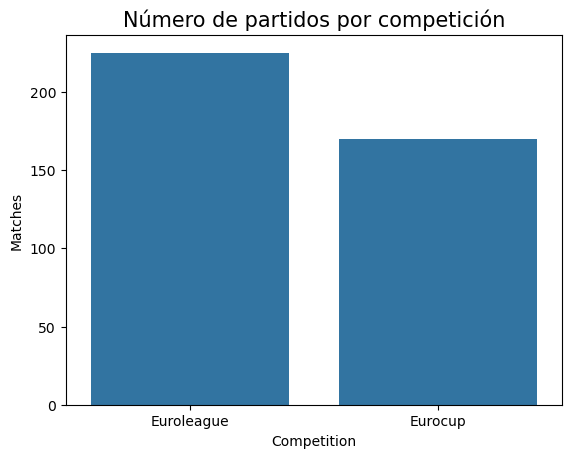

In [5]:
sns.countplot(x = competition.Competition)
plt.xlabel("Competition")
plt.ylabel("Matches")
plt.title("Número de partidos por competición", size=15)
plt.show()

In [6]:
# 2. What are the maximum points that a local team has scored per competition? And the road team as well. 
# convierto el tipo de Roadscore a int
competition.Roadscore = competition.Roadscore.astype("int64")
competition.groupby(by = "Competition").agg({"Localscore":"max", "Roadscore":"max"})

,Localscore,Roadscore
Competition,,
Eurocup,120,114
Euroleague,130,126


In [7]:
max_localscore = competition.groupby("Competition")["Localscore"].max()
max_roadscore = competition.groupby("Competition")["Roadscore"].max()
max_localscore

Competition
Eurocup       120
Euroleague    130
Name: Localscore, dtype: int64

In [8]:
max_roadscore

Competition
Eurocup       114
Euroleague    126
Name: Roadscore, dtype: int64

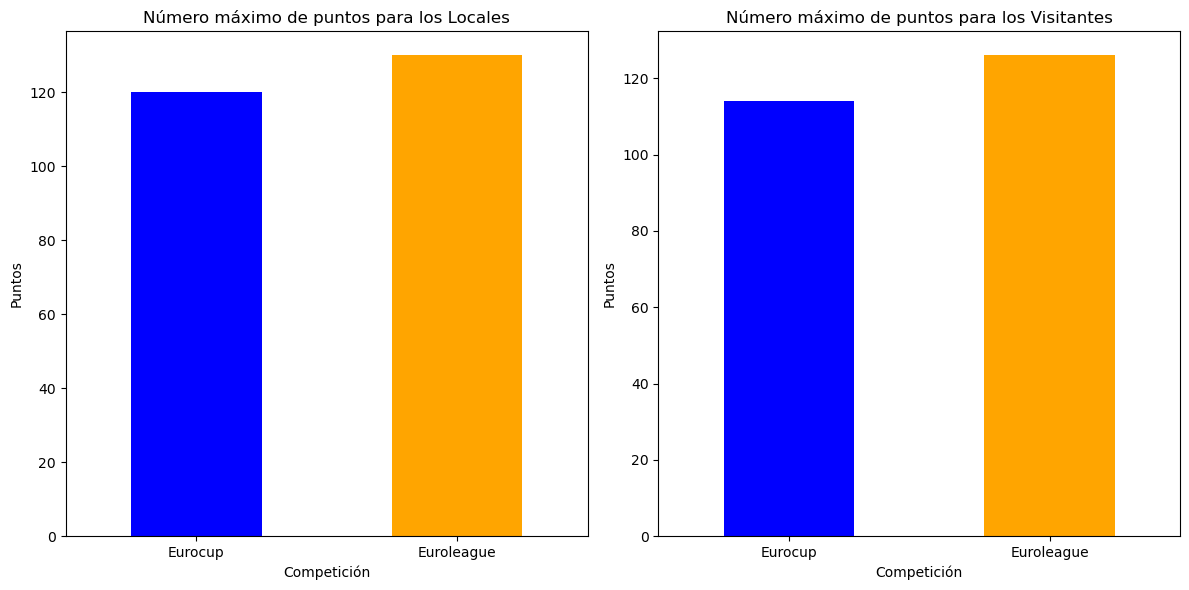

In [9]:
max_localscore = competition.groupby("Competition")["Localscore"].max()
max_roadscore = competition.groupby("Competition")["Roadscore"].max()
color_map = {comp: ("blue" if comp == "Eurocup" else "orange") for comp in max_localscore.index}

# para sacar más de un gráfico
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

max_localscore.plot(kind="bar", color = [color_map[comp] for comp in max_localscore.index], title="Número máximo de puntos para los Locales", ax=axs[0])
axs[0].set_xticklabels(max_localscore.index, rotation=0)
axs[0].set_ylabel("Puntos")
axs[0].set_xlabel("Competición")

max_roadscore.plot(kind="bar", color = [color_map[comp] for comp in max_roadscore.index], title="Número máximo de puntos para los Visitantes", ax=axs[1])
axs[1].set_xticklabels(max_roadscore.index, rotation=0)
axs[1].set_ylabel("Puntos")
axs[1].set_xlabel("Competición")

plt.tight_layout()
plt.show()


In [10]:
# 3. Do the same operations with the average points (per competition)
competition[["Competition","Localscore", "Roadscore"]].groupby(by = "Competition").mean().round(2)


,Localscore,Roadscore
Competition,,
Eurocup,85.24,83.96
Euroleague,83.28,79.17


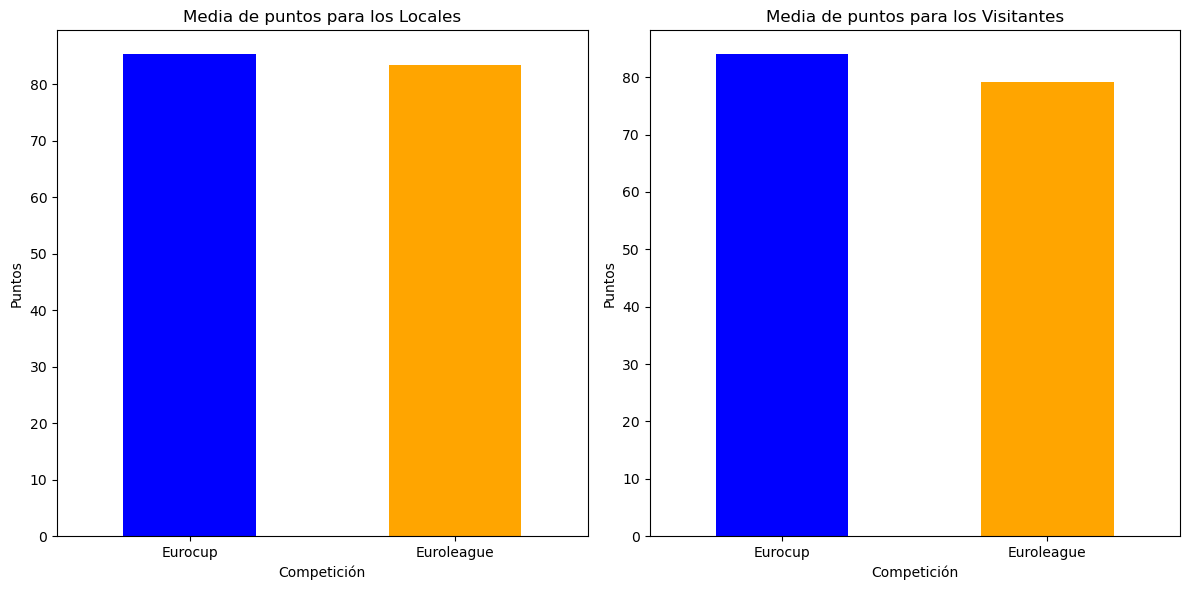

In [11]:
# grafico
mean_localscore = competition.groupby("Competition")["Localscore"].mean()
mean_roadscore = competition.groupby("Competition")["Roadscore"].mean()
color_map = {comp: ("blue" if comp == "Eurocup" else "orange") for comp in mean_localscore.index}

# para sacar más de un gráfico
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

mean_localscore.plot(kind="bar", color = [color_map[comp] for comp in mean_localscore.index], title="Media de puntos para los Locales", ax=axs[0])
axs[0].set_xticklabels(mean_localscore.index, rotation=0)
axs[0].set_ylabel("Puntos")
axs[0].set_xlabel("Competición")

mean_roadscore.plot(kind="bar", color = [color_map[comp] for comp in mean_roadscore.index], title="Media de puntos para los Visitantes", ax=axs[1])
axs[1].set_xticklabels(mean_roadscore.index, rotation=0)
axs[1].set_ylabel("Puntos")
axs[1].set_xlabel("Competición")

plt.tight_layout()
plt.show()

In [12]:
# 4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    # - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
competition.Plusminus = competition.Plusminus.astype("int64")
competition["Absolut_Plusminus"] = abs(competition.Plusminus)
competition.head()
competition.groupby("Competition").agg({"Absolut_Plusminus": "max"})

,Absolut_Plusminus
Competition,
Eurocup,39
Euroleague,39


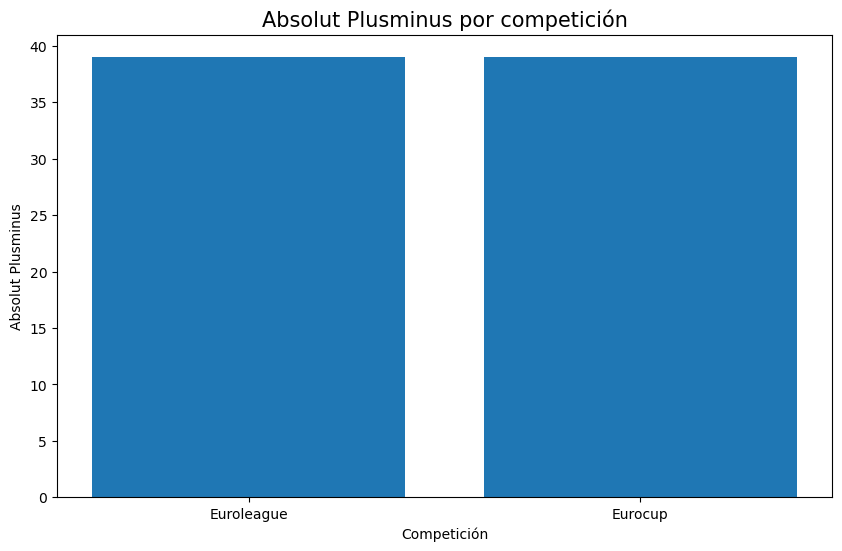

In [17]:
# grafico
plt.figure(figsize = (10,6))
plt.bar(competition["Competition"], competition["Absolut_Plusminus"])
plt.xlabel("Competición")
plt.ylabel("Absolut Plusminus")
plt.title("Absolut Plusminus por competición", size=15)
plt.show()


In [19]:
# 5. Also grouped by competition, give me the number of victories of the Locals and the Visitors
pd.crosstab(competition["Competition"], competition["Ganador"], competition["Ganador"], aggfunc = "count") 

Ganador,Local,Visitante
Competition,,
Eurocup,90,80
Euroleague,150,75


In [ ]:
# otra manera de hacer el crosstab
pd.crosstab(index = competition["Competition"], columns = competition["Ganador"], margins = True, margins_name= "Total")

Ganador,Local,Visitante,Total
Competition,,,
Eurocup,90,80,170
Euroleague,150,75,225
Total,240,155,395


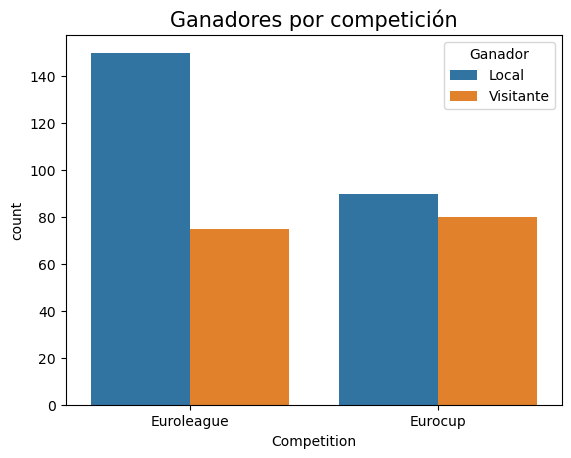

In [22]:
sns.countplot(data = competition, x="Competition", hue="Ganador")
plt.title("Ganadores por competición", size=15)
plt.show()

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

In [23]:
competition

,Competition,Localscore,Roadscore,Plusminus,Ganador,Absolut_Plusminus
0,Euroleague,94,73,21,Local,21
1,Euroleague,96,81,15,Local,15
2,Euroleague,79,82,-3,Visitante,3
3,Euroleague,80,68,12,Local,12
4,Euroleague,91,74,17,Local,17
...,...,...,...,...,...,...
390,Eurocup,80,71,9,Local,9
391,Eurocup,97,77,20,Local,20
392,Eurocup,105,78,27,Local,27
393,Eurocup,80,70,10,Local,10


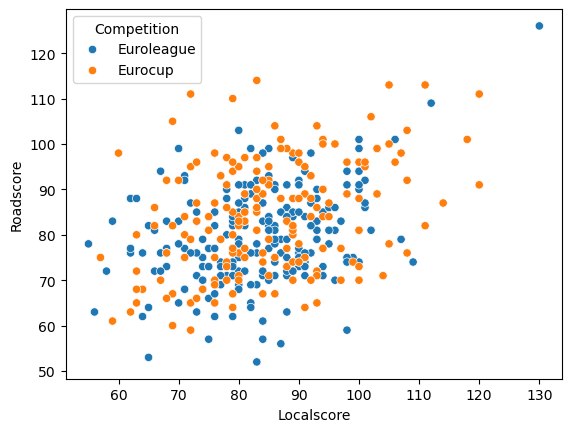

In [26]:
# Comparison Chart
sns.scatterplot(x="Localscore", y="Roadscore", 
                hue="Competition",
                data=competition)
plt.show()



**Your comments here**
- en la EuroCopa está bastante equilibrado menos algunos partidos en los que el localscore es mayor que el roadscore (la parte derecha del grafico) y otros en los que el roadscore es mayor que el localscore (parte izquierda de arriba)
- en la Euroliga hay una parte en donde los visitantes han marcado más puntos que los locales pero también hay otra parte del grafico que muestra que los locales han marcados más puntos que los visitantes

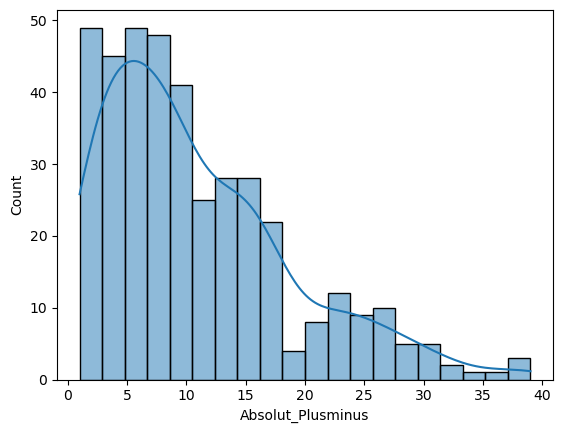

In [20]:
# Histogram
sns.histplot(x="Absolut_Plusminus", bins=20, data = competition, kde=True); # bins son los rangos /el histplot no muestra los Nans
# kde=approximation of the distribution /kernel density estimation

**Your comments here**
- observamos que la diferencia de puntos se centra en la mayoría de partidos hasta los 18 puntos y se va haciendo más pequeña
- a partir de los 30 puntos de diferencia ya hay muy pocos partidos

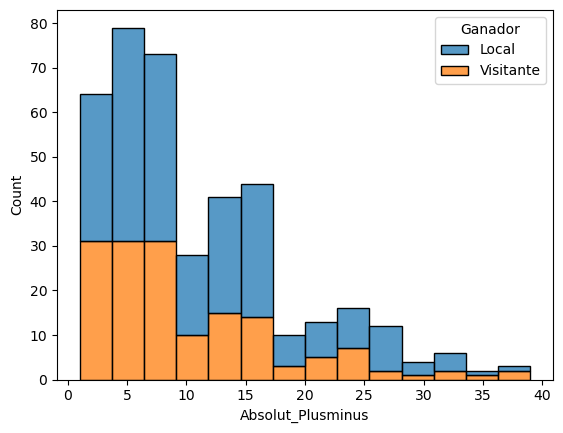

In [27]:
# Stacked columns
sns.histplot(data=competition, x="Absolut_Plusminus", hue="Ganador", multiple="stack");



**Your comments here**
- Cuando la diferencia de puntos oscila entre 5 y 33 suele ganar el equipo Local
- Cuando en cambio la diferencia es mínima o muy alta, es el equipo visitante que suele ganar

In [29]:
corr=competition[["Localscore", "Roadscore", "Absolut_Plusminus"]].corr()
corr


,Localscore,Roadscore,Absolut_Plusminus
Localscore,1.000000,0.356716,0.134643
Roadscore,0.356716,1.000000,-0.074829
Absolut_Plusminus,0.134643,-0.074829,1.000000


<Axes: >

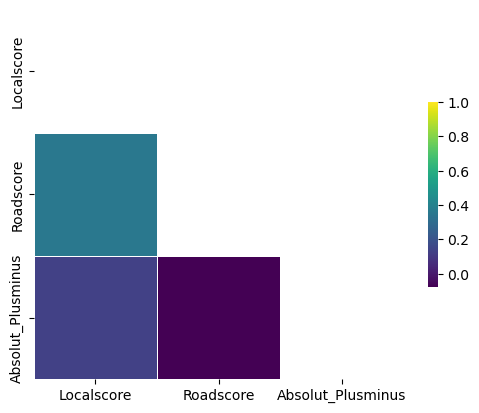

In [31]:
# Correlation / Heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
corr=competition[["Localscore", "Roadscore", "Absolut_Plusminus"]].corr()
sns.heatmap(corr,  
            mask = mask,
            cmap="viridis",
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5})

**Your comments here**
- Localscore y Roadscore tienen una relación leve positiva. A medida que uno sube, el otro tiene una ligera tendencia a subir también, es decir no suele haber mucha diferencia de puntos en la mayoría de partidos (en algunos sí, como ya hemos visto con el histograma, pero son pocos)
- Localscore y Absolut_Plusminus tienen una relación muy débil, casi nula. Hay una ligerisíma tendencia a que, cuando los puntos del local suben, el valor absoluto de Plusminus también lo haga, pero esta relación es muy débil y no se puede considerar como una dependencia significativa entre estas dos variables.
- Roadscore y Absolut_Plusminus tienen una relación muy débil y negativa. Esto significa que cuando los puntos del visitante aumentan, el AbsolutPlusminuns (que es la diferencia de puntos) tiende a disminuir ligeramente, pero como ya dicho es una relación muy debil, casi nula.


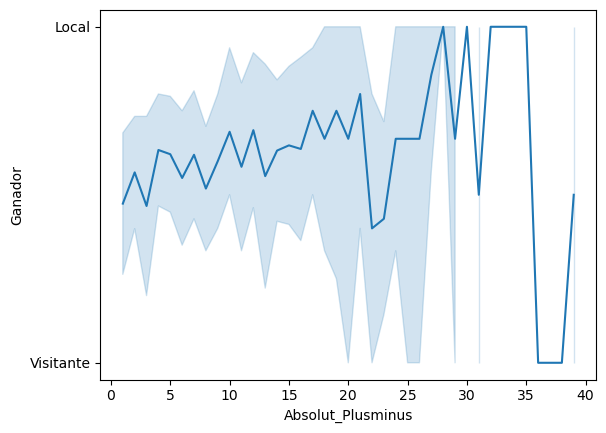

In [32]:
# Trends
sns.lineplot(x='Absolut_Plusminus', 
             y="Ganador", 
             data=competition,
             palette=['red', 'blue']);


**Your comments here**
- la tendencia es que mientras la diferencia de puntos se contenga en niveles bajos (hasta 30), suele ganar el equipo local